__Задача 1__

$$Максимизировать \:\:c^Tx$$ 
$$при\: условии  \: \:Ax = b$$ 
$$x \leq 0$$

В обозначениях с лекций:

$$
f(x) = c^Tx, \: g(x) = -x, \: h(x) = Ax - b
$$
Напишем лагранжиан:

$$
L(x, \lambda, \mu) = f(x)+\lambda^Tg(x)+\mu^Th(x) = c^Tx - \lambda^Tx +  \mu^TAx - \mu^Tb
$$
 
$$
q(\lambda, \mu) = \inf_{x\in \mathcal{D}}L(x, \lambda, \mu)
$$

Заметим, что это $L$ линейная функция от x, поэтому $q(\lambda, \mu) = -\infty$, если $c^T - \lambda^T +  \mu^TA \neq 0 $, иначе $q(\lambda, \mu) = - \mu^Tb$

Таким образом, двойственная задача:
$$
q(\lambda, \mu) \rightarrow max, \lambda \geq 0
$$

эквивалентна такой:
$$
-\mu^Tb \rightarrow max, \lambda \geq 0, c^T - \lambda^T +  \mu^TA = 0
$$

In [2]:
import cvxpy as cp
import numpy as np

def dual(c, A, b):
    lambda_ = cp.Variable(c.size)
    mu = cp.Variable(b.size)
    constraints = [lambda_ >= 0, c.T - lambda_.T + mu.T @ A == 0]
    prob = cp.Problem(
        cp.Minimize(mu.T @ b),
        constraints
    )
    prob.solve()
    return lambda_.value, mu.value

In [3]:
c = np.array([50, 10])
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 11])
lambda_, mu = dual(c, A, b)
lambda_, mu

(array([ 1.95592050e-10, -1.88938326e-10]), array([ 85., -45.]))

Из дополняющей нежесткости следует, что если $\lambda_i \neq 0$, то $x_i = 0$. Иначе можно решить $Ax=b$

In [4]:
from scipy.linalg import solve

def solve_(A, b, lambda_):
    ind = lambda_ < 1e-5
    A1 = A[:, ind]
    x1 = np.linalg.inv(A1.T @ A1) @ A1.T @ b #если матрица не квадратная
    x = np.zeros(A.shape[1])
    x[ind] = x1
    
    return x

In [5]:
solve_(A, b, lambda_)

array([1., 2.])

__Задача 2__

In [6]:
def centre(points):
    ans = cp.Variable((1, points.shape[1]))
    problem = cp.Problem(
        cp.Minimize(
            cp.max(cp.sum((points - ans)**2, axis=1))
        )
    )
    problem.solve()
    return ans.value, np.sqrt(problem.value)

In [7]:
centre(np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1], 
    [2, 2]
]))

(array([[1., 1.]]), 1.4142135623762475)

__Задача 3__

Найти минимум $\max\limits_{y_i = 1} a^T x_i - \min\limits_{y_i = 0} a^T x_i$


In [121]:
def svm(x, y):
    a = cp.Variable((1, x.shape[1]))
    cl1 = x[y == 1]
    cl0 = x[y == 0]
    max1 = cp.Variable(1)
    min0 = cp.Variable(1)
    objective = cp.Minimize(max1 - min0)
    constraints = [min0 <= x @ a.T for x in cl0] + [max1 >= x @ a.T for x in cl1] + [cp.sum(a ** 2) <= 1]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    return a.value[0], prob.value


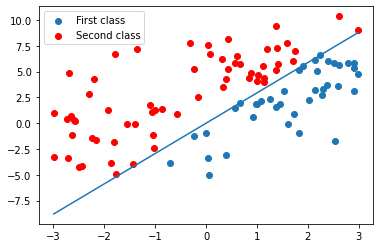

In [123]:
import matplotlib.pyplot as plt

xs = np.random.uniform(-3, 3, 100)

a_ = 3

data = []
for x in xs:
    y = x + np.random.normal(2, 3)
    cl = int(y > (a_ * x))
    data += [[ x, y, cl]]

    
data = np.array(data)
points = data[:, :2]
classes = data[:, 2]

a, v = svm(points, classes)

plt.scatter(points[classes == 0, 0], points[classes == 0, 1], label='First class')
plt.scatter(points[classes == 1, 0], points[classes == 1, 1], label='Second class', color='red')


space = np.linspace(np.min(points[:, 0]), np.max(points[:, 0]), 1000)
plt.plot( space , - space * a[0] / a[1])
plt.legend()